**Feature_engineering_stage**

* Handling Missing Values
* Converting Cat to Num data
* Handling Outliers
* Variable Transformation
* Feature Scaling

**Handling_Missing_Values**

1. Using Mean_Median_Mode
2. End_of_Distribution
3. Arbitary_value
4. Constant_value_concept
5. Random_Sample_Imputation **

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv('Titanic-Dataset.csv')

In [82]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [83]:
data.shape

(891, 12)

In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Using_Mean_Median_Mode**

In [85]:
def missing_data(data,var,mean,median,mode):
  data[var+'_mean'] = data[var].fillna(mean)
  data[var+'_median'] = data[var].fillna(median)
  data[var+'_mode'] = data[var].fillna(mode[0])

age_mean = data['Age'].mean()
age_median = data['Age'].median()
age_mode = data['Age'].mode()

missing_data(data,'Age',age_mean,age_median,age_mode)

In [86]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_mode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118,28.0,24.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000,54.0,54.0


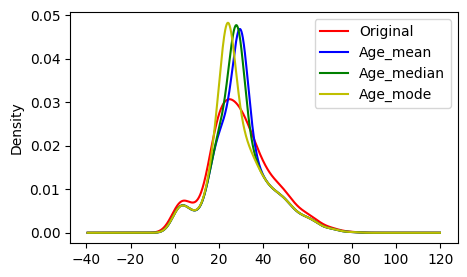

In [87]:
plt.figure(figsize=(5,3))

data['Age'].plot(kind='kde',color='r',label='Original')
data['Age_mean'].plot(kind='kde',color='b',label='Age_mean')
data['Age_median'].plot(kind='kde',color='g',label='Age_median')
data['Age_mode'].plot(kind='kde',color='y',label='Age_mode')

plt.legend(loc = 0)
plt.show()

In [88]:
print(f'Original Age Column with Null values : {data["Age"].std()}')
print(f'Age_mean : {data["Age_mean"].std()}')
print(f'Age_median : {data["Age_median"].std()}')
print(f'Age_mode : {data["Age_mode"].std()}')

Original Age Column with Null values : 14.526497332334044
Age_mean : 13.002015226002884
Age_median : 13.019696550973194
Age_mode : 13.199571767746487


In [89]:
# since mode std is close to original age so i can finalize mode:

data = data.drop(['Age','Age_mean','Age_median'],axis=1)
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mode
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,24.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,S,54.0


**End_of_Distribution**

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = pd.read_csv('Titanic-Dataset.csv')

In [92]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [93]:
value = data['Age'].mean() + 3 * data['Age'].std()
value

73.27860964406095

In [94]:
data['Age_end'] = data['Age'].fillna(value)

In [95]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_end
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,73.27861
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.00000


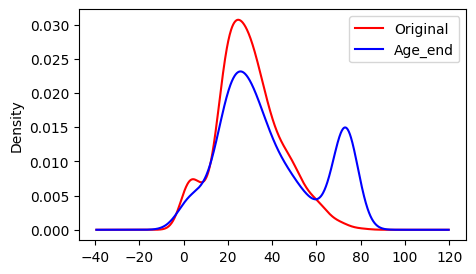

In [96]:
plt.figure(figsize=(5,3))

data['Age'].plot(kind='kde',color='r',label='Original')
data['Age_end'].plot(kind='kde',color='b',label='Age_end')

plt.legend(loc = 0)
plt.show()

In [97]:
print(f'Original Age Column with Null values : {data["Age"].std()}')
print(f'Age_end : {data["Age_end"].std()}')

Original Age Column with Null values : 14.526497332334044
Age_end : 21.719150677136366


**Arbitary_value & Constant_value**

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data = pd.read_csv('Titanic-Dataset.csv')

In [100]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [101]:
data['Age_arbi'] = data['Age'].fillna(999)
data['Age_const'] = np.where(data['Age'].isnull(),0,1)

In [102]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_arbi,Age_const
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,999.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,1


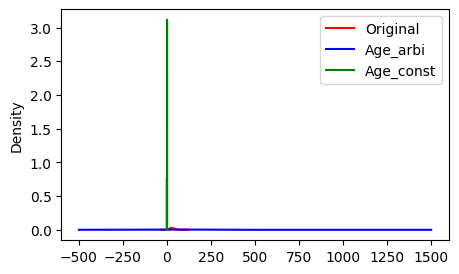

In [103]:
plt.figure(figsize=(5,3))

data['Age'].plot(kind='kde',color='r',label='Original')
data['Age_arbi'].plot(kind='kde',color='b',label='Age_arbi')
data['Age_const'].plot(kind='kde',color='g',label='Age_const')

plt.legend(loc = 0)
plt.show()

In [104]:
print(f'Original Age Column with Null values : {data["Age"].std()}')
print(f'Age_arbi : {data["Age_arbi"].std()}')
print(f'Age_const : {data["Age_const"].std()}')

Original Age Column with Null values : 14.526497332334044
Age_arbi : 387.17340362718875
Age_const : 0.3992104339880471


**Random_sample_imputation**

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
data = pd.read_csv('Titanic-Dataset.csv')

In [107]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [108]:
s = data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=42)
s

,Age
149,42.0
407,3.0
53,29.0
369,24.0
818,43.0
...,...
38,18.0
247,24.0
445,4.0
323,22.0


In [109]:
data[data['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [110]:
x = data[data['Age'].isnull()].head(1)
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [111]:
s = data['Age'].dropna().sample(1 , random_state=42)
print(s)
print(s.index)
s.index = [10]
data['Age_c'] = s

149    42.0
Name: Age, dtype: float64
Index([149], dtype='int64')


In [112]:
data.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_c
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN


In [113]:
def random(df,var):
  df[var+"_replaced"] = df[var].copy()
  s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state=42)
  s.index = df[df['Age'].isnull()].index
  df.loc[df['Age'].isnull() , 'Age_replaced'] = s

In [114]:
random(data,'Age')

In [115]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_c,Age_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,42.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,NaN,54.0


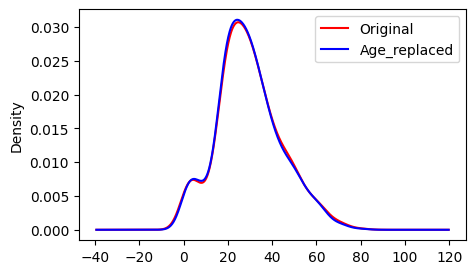

In [116]:
plt.figure(figsize=(5,3))

data['Age'].plot(kind='kde',color='r',label='Original')
data['Age_replaced'].plot(kind='kde',color='b',label='Age_replaced')

plt.legend(loc = 0)
plt.show()

In [117]:
print(f'Original Age Column with Null values : {data["Age"].std()}')
print(f'Age_arbi : {data["Age_replaced"].std()}')

Original Age Column with Null values : 14.526497332334044
Age_arbi : 14.295286948654615


In [118]:
# cat_to_num using one_hot_encoding ->  get_dummies

In [119]:
data = pd.DataFrame({'Name' : ['John','Peter','Priya','Hasini'],
                     'Gender' : ['Male','Male','Female','Female'],
                     'Region' : ['East','West','North','South']})
data

,Name,Gender,Region
0,John,Male,East
1,Peter,Male,West
2,Priya,Female,North
3,Hasini,Female,South


In [120]:
f = pd.get_dummies(data[['Gender','Region']],dtype=float)
f

,Gender_Female,Gender_Male,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0


In [121]:
final = pd.concat([data,f],axis=1)
final

,Name,Gender,Region,Gender_Female,Gender_Male,Region_East,Region_North,Region_South,Region_West
0,John,Male,East,0.0,1.0,1.0,0.0,0.0,0.0
1,Peter,Male,West,0.0,1.0,0.0,0.0,0.0,1.0
2,Priya,Female,North,1.0,0.0,0.0,1.0,0.0,0.0
3,Hasini,Female,South,1.0,0.0,0.0,0.0,1.0,0.0


**Variable Transformation**

* Log Technique
* reciprocal
* square root
* exponential
* box cox
* yeojohnson Technique

In [122]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
from scipy import stats
import pylab
import scipy

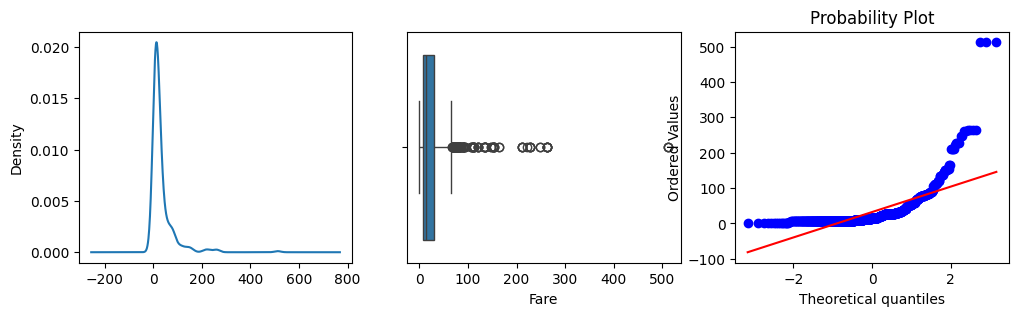

In [124]:
def fun(data,var):
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  data[var].plot(kind='kde')

  plt.subplot(1,3,2)
  sns.boxplot(x = data[var])

  plt.subplot(1,3,3)
  stats.probplot(data[var],dist='norm',plot=plt)
  plt.show()

fun(data,'Fare')

In [125]:
# log

data['Fare_log'] = np.log(data['Fare']+1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765


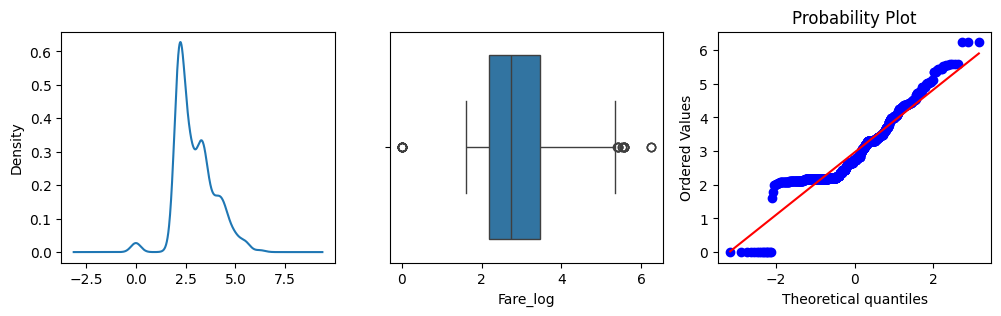

In [126]:
fun(data,'Fare_log')

In [127]:
# reciprocal

data['Fare_re'] = 1 / data['Fare']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Fare_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,0.137931
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,0.014029
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,0.126183
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,0.018832
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765,0.124224


ValueError: array must not contain infs or NaNs

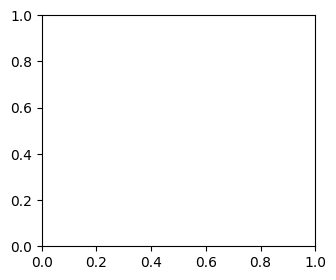

In [128]:
fun(data,'Fare_re')

In [ ]:
# square root

data['Fare_sqrt'] = np.sqrt(data['Fare'])
data.head()

In [ ]:
fun(data,'Fare_sqrt')

In [ ]:
# exponential

data['Fare_e'] = np.exp(data['Fare'])
data.head()

In [ ]:
fun(data,'Fare_e')

In [ ]:
# boxcox

data['Fare_box'] , lam = stats.boxcox(data['Fare'])

In [ ]:
fun(data,'Fare_box')

In [ ]:
# yeojohnson transformation

data['Fare_yeo'], lam = stats.yeojohnson(data['Fare'].fillna(data['Fare'].mean()))

In [ ]:
fun(data,'Fare_yeo')

**Handle Outliers**

* Trimming
* capping with mean and std
* 5th and 95th quantile

**Trimming**

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

In [ ]:
# fare column boxplot

plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare'])
plt.show()

In [ ]:
def fun(df,var):
  iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
  upper = df[var].quantile(0.75) + (1.5 * iqr)
  lower = df[var].quantile(0.25) - (1.5 * iqr)
  return upper,lower

upper_value,lower_value = fun(df,'Fare')
print(upper_value)
print(lower_value)

In [ ]:
df['Fare_trimming'] = np.where(df['Fare'] > upper_value,upper_value,
                      np.where(df['Fare'] < lower_value,lower_value,df['Fare']))
df.head()

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare_trimming'])
plt.show()

**capping with mean and std**

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

In [ ]:
# fare column boxplot

plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare'])
plt.show()

In [ ]:
def fun(df,var):
  upper = df[var].mean() + 3 * df[var].std()
  lower = df[var].mean() - 3 * df[var].std()
  return upper,lower

upper_value,lower_value = fun(df,'Fare')
print(upper_value)
print(lower_value)

In [ ]:
df['Fare_capping'] = np.where(df['Fare'] > upper_value,upper_value,
                      np.where(df['Fare'] < lower_value,lower_value,df['Fare']))
df.head()

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare_capping'])
plt.show()

**5th and 95th quantile**

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

In [ ]:
# fare column boxplot

plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare'])
plt.show()

In [ ]:
def fun(df,var):
  upper = df[var].quantile(0.95)
  lower = df[var].quantile(0.05)
  return upper,lower

upper_value,lower_value = fun(df,'Fare')
print(upper_value)
print(lower_value)

In [ ]:
df['Fare_5th_95th'] = np.where(df['Fare'] > upper_value,upper_value,
                      np.where(df['Fare'] < lower_value,lower_value,df['Fare']))
df.head()

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x = df['Fare_5th_95th'])
plt.show()